In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold, GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, roc_curve, precision_recall_curve, auc, confusion_matrix, roc_auc_score, f1_score
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.impute import KNNImputer
from xgboost import XGBClassifier

from sklearn.model_selection import GridSearchCV,RandomizedSearchCV

import warnings
warnings.filterwarnings("ignore")

In [15]:
df = pd.read_csv("disease.csv")
df_test = pd.read_csv("disease_testing.csv")
df_symptom_description = pd.read_csv("symptom_Description.csv")
df.head()

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis,Unnamed: 133
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN
1,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN
2,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN
3,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN
4,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN


In [16]:
# droping a useless column named 'Unnamed column'
df.drop('Unnamed: 133',axis =1 , inplace = True)

In [17]:
df.shape

(4920, 133)

In [18]:
# data info: columns with data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4920 entries, 0 to 4919
Columns: 133 entries, itching to prognosis
dtypes: int64(132), object(1)
memory usage: 5.0+ MB


In [19]:
df['prognosis'].value_counts()

Impetigo                                   120
Jaundice                                   120
Migraine                                   120
Allergy                                    120
Alcoholic hepatitis                        120
(vertigo) Paroymsal  Positional Vertigo    120
Bronchial Asthma                           120
Osteoarthristis                            120
Hepatitis D                                120
Pneumonia                                  120
Diabetes                                   120
Varicose veins                             120
Hypothyroidism                             120
Paralysis (brain hemorrhage)               120
Chronic cholestasis                        120
Heart attack                               120
AIDS                                       120
Peptic ulcer diseae                        120
Arthritis                                  120
Hepatitis B                                120
Common Cold                                120
Fungal infect

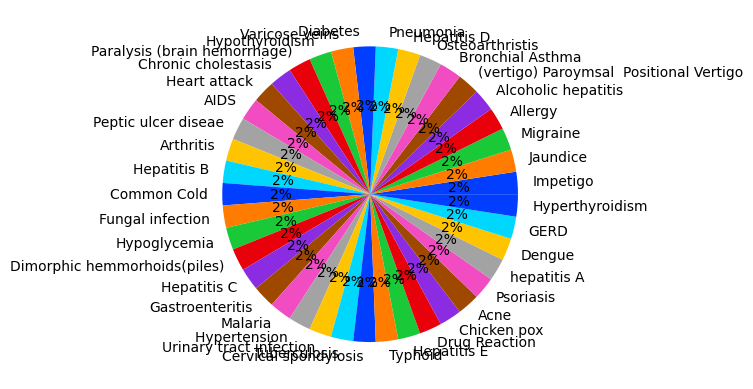

In [20]:
# Number of variables of both stroke and not stroke classes on the dataset
data = df["prognosis"].value_counts()
labels = df["prognosis"].value_counts().index

palette_color = sns.color_palette('bright')
plt.pie(data, labels=labels, colors=palette_color, autopct='%.0f%%');

In [21]:
df.isnull().sum()

itching                 0
skin_rash               0
nodal_skin_eruptions    0
continuous_sneezing     0
shivering               0
                       ..
inflammatory_nails      0
blister                 0
red_sore_around_nose    0
yellow_crust_ooze       0
prognosis               0
Length: 133, dtype: int64

In [22]:
df.prognosis

0                              Fungal infection
1                              Fungal infection
2                              Fungal infection
3                              Fungal infection
4                              Fungal infection
                         ...                   
4915    (vertigo) Paroymsal  Positional Vertigo
4916                                       Acne
4917                    Urinary tract infection
4918                                  Psoriasis
4919                                   Impetigo
Name: prognosis, Length: 4920, dtype: object

In [23]:
diseases=df.prognosis

In [24]:
#Encoding
e=LabelEncoder()
df['prognosis']=e.fit_transform(df['prognosis'])
df_test['prognosis']=e.fit_transform(df_test['prognosis'])

In [25]:
df.prognosis

0       15
1       15
2       15
3       15
4       15
        ..
4915     0
4916     2
4917    38
4918    35
4919    27
Name: prognosis, Length: 4920, dtype: int32

In [26]:
#x_train=df.iloc[:, :-2].values
x_train=df.drop("prognosis", axis=1)
x_train.shape

(4920, 132)

In [27]:
y_train=df.iloc[:, 132].values
y_train.shape

(4920,)

In [28]:
x_test=df_test.drop(columns='prognosis',axis=1)
x_test.shape

(42, 132)

In [29]:
y_test=df_test['prognosis']
y_test.shape

(42,)

In [30]:
#Scaling features between -1 and 1
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)

In [31]:
scaler = StandardScaler()
x_test = scaler.fit_transform(x_test)

SVM with Hyperparameter Tuning

In [32]:
param_grid={'C':[0.1,1,100,1000],'kernel':['linear','rbf','poly','sigmoid',],'degree':[1,2,3,4,5,6]}
grid=GridSearchCV(SVC(),param_grid)
grid.fit(x_train,y_train)

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 100, 1000], 'degree': [1, 2, 3, 4, 5, 6],
                         'kernel': ['linear', 'rbf', 'poly', 'sigmoid']})

In [33]:
print(grid.best_params_)
print(f'Training accuracy: ',grid.score(x_train,y_train))
print(f'Testing accuracy: ',grid.score(x_test,y_test))
print(classification_report(y_test,grid.predict(x_test)))

{'C': 0.1, 'degree': 1, 'kernel': 'linear'}
Training accuracy:  1.0
Testing accuracy:  1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       1.00      1.00      1.00         1
           2       1.00      1.00      1.00         1
           3       1.00      1.00      1.00         1
           4       1.00      1.00      1.00         1
           5       1.00      1.00      1.00         1
           6       1.00      1.00      1.00         1
           7       1.00      1.00      1.00         1
           8       1.00      1.00      1.00         1
           9       1.00      1.00      1.00         1
          10       1.00      1.00      1.00         1
          11       1.00      1.00      1.00         1
          12       1.00      1.00      1.00         1
          13       1.00      1.00      1.00         1
          14       1.00      1.00      1.00         1
          15       1.00      1.00      1.00 

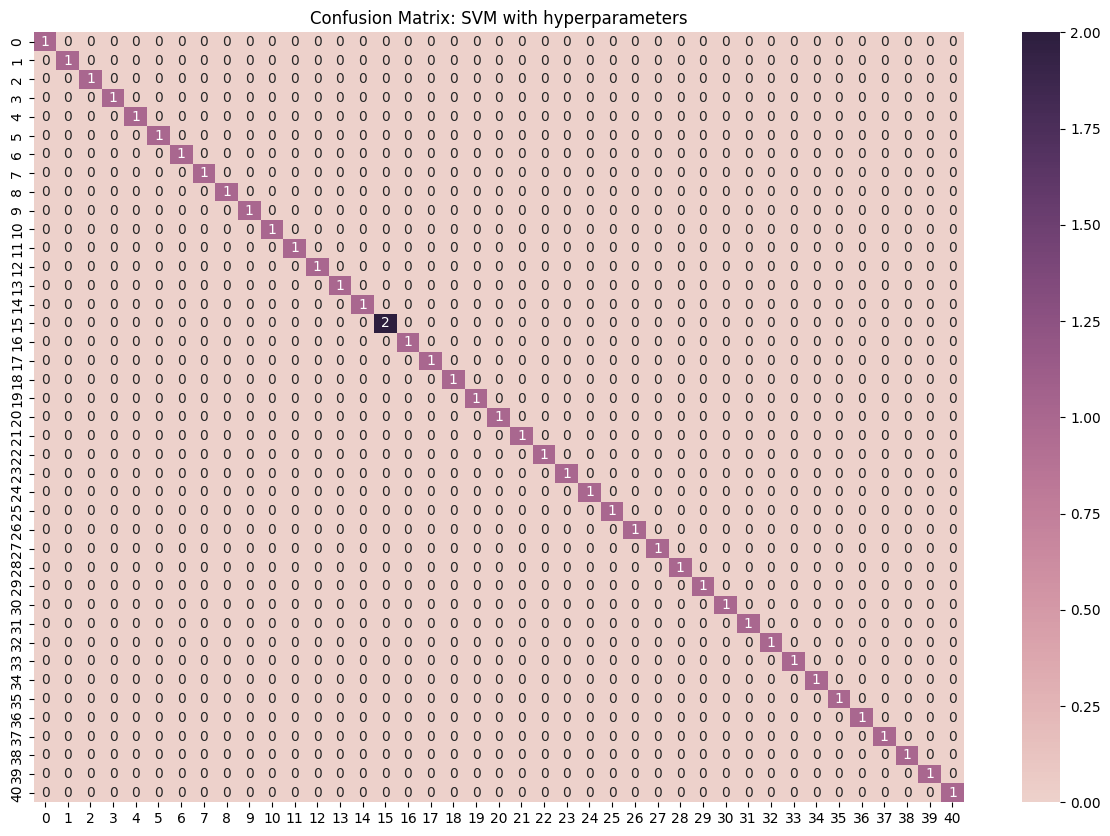

In [34]:
plt.figure(figsize=(15,10))
cf_matrix = confusion_matrix(y_test, grid.predict(x_test))
plt.title('Confusion Matrix: {}'.format('SVM with hyperparameters'))
sns.heatmap(cf_matrix, annot = True, fmt = 'g', cmap = sns.cubehelix_palette(as_cmap=True))
plt.show()

In [35]:
disease_array = np.array(diseases)
disease_array.sort()
d=np.unique(disease_array)
print(d)

['(vertigo) Paroymsal  Positional Vertigo' 'AIDS' 'Acne'
 'Alcoholic hepatitis' 'Allergy' 'Arthritis' 'Bronchial Asthma'
 'Cervical spondylosis' 'Chicken pox' 'Chronic cholestasis' 'Common Cold'
 'Dengue' 'Diabetes ' 'Dimorphic hemmorhoids(piles)' 'Drug Reaction'
 'Fungal infection' 'GERD' 'Gastroenteritis' 'Heart attack' 'Hepatitis B'
 'Hepatitis C' 'Hepatitis D' 'Hepatitis E' 'Hypertension '
 'Hyperthyroidism' 'Hypoglycemia' 'Hypothyroidism' 'Impetigo' 'Jaundice'
 'Malaria' 'Migraine' 'Osteoarthristis' 'Paralysis (brain hemorrhage)'
 'Peptic ulcer diseae' 'Pneumonia' 'Psoriasis' 'Tuberculosis' 'Typhoid'
 'Urinary tract infection' 'Varicose veins' 'hepatitis A']


In [36]:
input_data = (0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0)


#changing the input data to numpy array

input_array = np.asarray(input_data)

#reshaping the array 
input_data_reshape = input_array.reshape(1,-1)

#standardizing the input data
std_data = (input_data_reshape-input_data_reshape.mean())/input_data_reshape.std()
print(std_data)

prediction = grid.predict(std_data)

if (prediction[0] <= 40):
 print('The detected disease: '+d[prediction[0]])
else:
 print('Disease not detected as per your symptoms')

[[-0.38448158 -0.38448158 -0.38448158  2.60090482 -0.38448158  2.60090482
  -0.38448158 -0.38448158 -0.38448158 -0.38448158 -0.38448158 -0.38448158
  -0.38448158 -0.38448158  2.60090482 -0.38448158 -0.38448158 -0.38448158
  -0.38448158 -0.38448158 -0.38448158 -0.38448158 -0.38448158 -0.38448158
   2.60090482  2.60090482 -0.38448158 -0.38448158 -0.38448158 -0.38448158
  -0.38448158  2.60090482 -0.38448158 -0.38448158 -0.38448158 -0.38448158
  -0.38448158 -0.38448158 -0.38448158 -0.38448158 -0.38448158 -0.38448158
  -0.38448158 -0.38448158 -0.38448158 -0.38448158 -0.38448158  2.60090482
   2.60090482 -0.38448158  2.60090482  2.60090482  2.60090482  2.60090482
   2.60090482  2.60090482  2.60090482 -0.38448158 -0.38448158 -0.38448158
  -0.38448158 -0.38448158 -0.38448158 -0.38448158 -0.38448158 -0.38448158
  -0.38448158 -0.38448158 -0.38448158 -0.38448158 -0.38448158 -0.38448158
  -0.38448158 -0.38448158 -0.38448158 -0.38448158 -0.38448158 -0.38448158
  -0.38448158 -0.38448158 -0.38448158 

In [37]:
disease_name = df_symptom_description.Disease
disease_name = np.array(disease_name)

In [38]:
for i in disease_name: 
    if(d[prediction[0]]==i):
        print(i)
        j=i
k=list(disease_name).index(j)
print(k)

Common Cold
17


In [39]:
disease_description = df_symptom_description.Description
disease_description = np.array(disease_description)

In [40]:
print("Disease Description: ")
print(d[prediction[0]]+" : "+disease_description[k])

Disease Description: 
Common Cold : The common cold is a viral infection of your nose and throat (upper respiratory tract). It's usually harmless, although it might not feel that way. Many types of viruses can cause a common cold.


In [41]:
with open('model.pkl','wb') as files:
    pickle.dump(grid,files)